In [1]:
%matplotlib inline
%load_ext line_profiler

import numpy as np

from scipy.sparse import coo_matrix

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

import linear_system_super_resolution as lssr

In [2]:
high_res_dim = 8
low_res_dim = 4
df = high_res_dim // low_res_dim
tile_dim = 0
k_supp = 3
kernel = lssr.gaussian_2d(k_supp)
# lssr.show_image(kernel, "Kernel")

# %time d = lssr.generate_d_matrix(high_res_dim, df)
# print(f"D size mb: {lssr.matrix_memory(d)}")
# lssr.show_image(d.todense(), "D")

# %time h = lssr.generate_h_matrix(high_res_dim, kernel)
# lssr.show_image(h.todense(), "H")

# %time dh = d @ h
# lssr.show_image(dh.todense(), "DH")

# %lprun -f lssr.generate_dh_matrix janky_dh = lssr.generate_dh_matrix(l, df, kernel)
# batched_dh = lssr.generate_dh_matrix_batched(l, df, kernel, tile_dim)
# lssr.show_image(janky_dh.todense(), "Janky DH")
# print(lssr.matrix_memory(janky_dh))

# diff = janky_dh - dh
# print(f"Diff: {diff.sum()}")
# lssr.show_image(diff.todense(), "Diff")



# h0 = lssr.generate_h_matrix_tiled(high_res_dim, kernel, high_res_dim**2, high_res_dim, 0)
# lssr.show_image(h0.todense(), "H0")

# d0 = d[0 : high_res_dim, :]
# lssr.show_image(d0.todense(), "D0")

# d0h0 = d0 @ h0
# lssr.show_image(d0h0.todense(), "D0H0")

# %time h1 = lssr.generate_h_matrix_tiled(high_res_dim, kernel, high_res_dim**2, high_res_dim, high_res_dim)
# lssr.show_image(h1.todense(), "H1")

# temp_h = lil_matrix((high_res_dim**2, high_res_dim**2), dtype=np.float32)
# tile_dim = high_res_dim // 1
# num_tiles = high_res_dim**2 // tile_dim

# for tile in range(num_tiles):
#     tile_h = lssr.generate_h_matrix_tiled(high_res_dim, kernel, high_res_dim**2, tile_dim, tile * tile_dim)
#     lssr.show_image(tile_h.todense(), "Tile H")
#     temp_h[:, tile * tile_dim : tile * tile_dim + tile_dim] += tile_h
    
# lssr.show_image(temp_h.todense(), "Temp H")
# lssr.show_image((temp_h - h).todense(), "H Diffs")

# %time dh_tiled = lssr.generate_dh_matrix_batched(high_res_dim, df, kernel, 5000) # 15 minutes... yuck
#print(f"Error between true dh and tiled dh: {(dh - dh_tiled).sum()}")

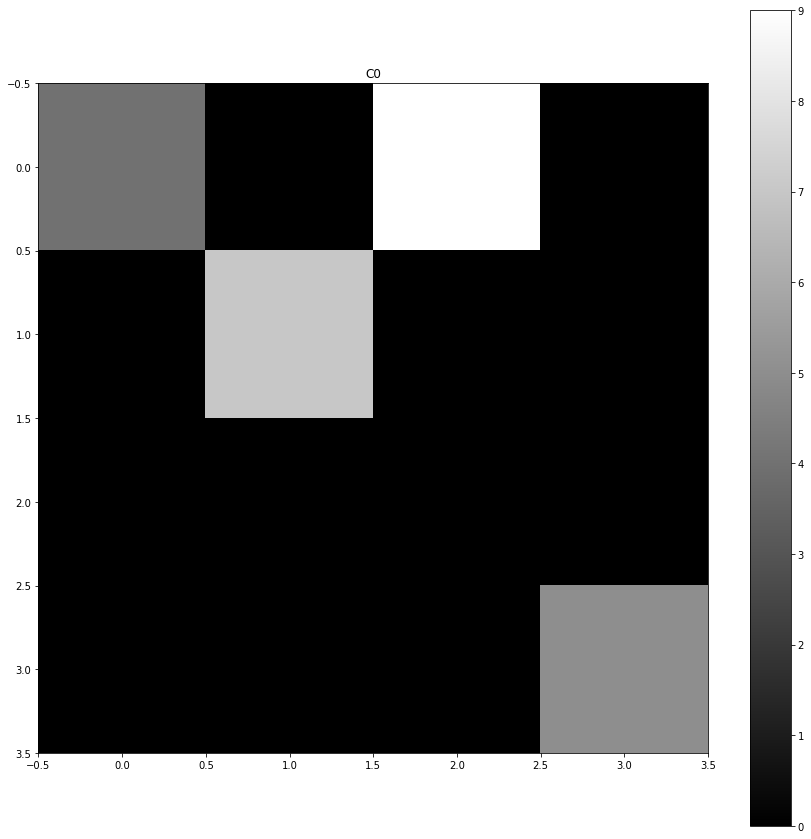

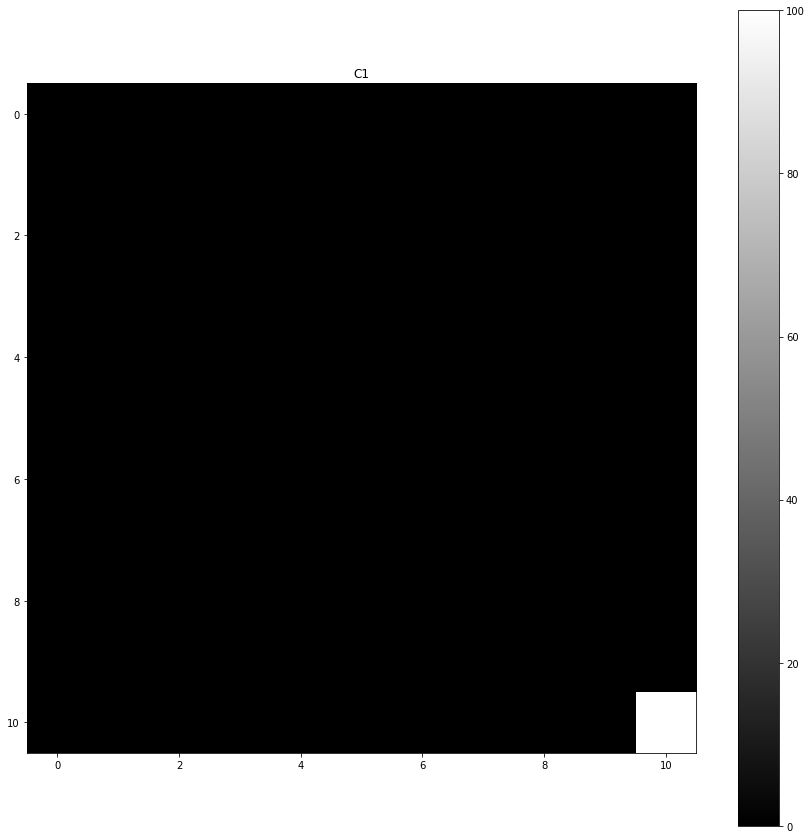

ValueError: inconsistent shapes

In [8]:
# Attempting to bring Numba into the mix...
# result = lssr.generate_dh_matrix_numba(high_res_dim, df, kernel)
# lssr.show_image(result.todense(), "Result")

row0  = np.array([0, 3, 1, 0])
col0  = np.array([0, 3, 1, 2])
data0 = np.array([4, 5, 7, 9])
coo0 = coo_matrix((data0, (row0, col0)), shape=(4, 4)).tocsr()

lssr.show_image(coo0.todense(), "C0")

row1  = np.array([10])
col1  = np.array([10])
data1 = np.array([100])
coo1 = coo_matrix((data1, (row1, col1))).tocsr()

# Notes for myself...
# Trying to produce a dh matrix by taking the stacked blur kernel and apply it on each row of a coo matrix, ignoring clipping for now...
# Ideally, the buffers for each row should be readily available and maybe I can use numba to populate in parallel...
# Once the coo matrix is populated, I should be able to trim the excess which I ignore initially...
# That is, there will be some crap to trim from the left and right hand sides of the coo matrix...